## Library:

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=df8171840137ca1445b5cd1ee714c6e9ba405b1d6c5d7dec4c62afe2113a3a78
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
! pip install fastprogress
from fastprogress import master_bar, progress_bar

In [ ]:
import wget
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import numpy as np
import re
import string
import random
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [ ]:
anime_path_url="https://github.com/HTL2910/Graph-based-recommend-system-using-GNN/blob/main/anime.csv"
rating_path_url="https://github.com/HTL2910/Graph-based-recommend-system-using-GNN/blob/main/rating.csv"

In [ ]:
#wget.download(anime_path_url, out='./anime.csv')
#wget.download(rating_path_url, out='./rating.csv')

#anime_df = pd.read_csv('./anime.csv')
#rating_df = pd.read_csv('./rating.csv')
anime_df = pd.read_csv('/content/anime.csv')
rating_df = pd.read_csv('/content/rating.csv')

## Exploration Data Analysis

In [ ]:
def some_infomation_dataset(df):
  print('Head: ')
  display(df.head(5))
  print('*********************************')
  print('Tail: ')
  display(df.tail(5))
  print('*********************************')
  print('Name of each columns in dataset',df.columns)
  print('*********************************')
  print('Types of columns: \n',df.dtypes)
  print('*********************************')
  print('Some Infomation of dataset \n',df.info())
  print('*********************************')
  print('Describe of dataset: \n',df.describe())
  print('*********************************')
  print('The number of duplicate values in dataset',df.duplicated().sum())
  print('*********************************')
  print('The number of missing values in the dataset:\n',df.isnull().sum())
  print('*********************************')
  print('The number of index in dataset:',df.index)
  print('*********************************')
  print('The number of unique valuess each columns in dataset: ')
  for i in range(len(df.columns)):
    print(df[df.columns[i]].value_counts().name,' : ',
        len(df[df.columns[i]].value_counts()))
  print('*********************************')

In [ ]:
def type_data_df(df):
  categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
  numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
  print('Categorical columns: ',categorical_cols)
  print('Numerical columns: ',numerical_cols)
def unique_data(df):
    len_df=len(df.columns)
    dic = dict()
    for i in range(len_df):
        dic[df.columns[i]]=df[df.columns[i]].sort_values().unique()
    return dic

In [ ]:
some_infomation_dataset(anime_df)
type_data_df(anime_df)
print("anime data unique:")
unique_data(anime_df)

Head: 


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


*********************************
Tail: 


,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


*********************************
Name of each columns in dataset Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')
*********************************
Types of columns: 
 anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object
*********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
Some Infomation of dataset 
 None
*********************************
Describ

{'anime_id': array([    1,     5,     6, ..., 34522, 34525, 34527]),
 'name': array(['&quot;0&quot;',
        '&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu',
        '&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi', ...,
        'Üks Uks', 'ēlDLIVE', '◯'], dtype=object),
 'genre': array(['Action', 'Action, Adventure',
        'Action, Adventure, Cars, Comedy, Sci-Fi, Shounen', ..., 'Vampire',
        'Yaoi', nan], dtype=object),
 'type': array(['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV', nan], dtype=object),
 'episodes': array(['1', '10', '100', '1006', '101', '102', '103', '104', '105', '108',
        '109', '11', '110', '112', '113', '114', '115', '117', '119', '12',
        '120', '124', '125', '127', '1274', '128', '13', '130', '1306',
        '132', '136', '137', '14', '140', '141', '142', '1428', '143',
        '145', '147', '1471', '148', '15', '150', '151', '153', '154',
        '155', '156', '1565', '16', '161', '162', '163', '164', '167',
       

In [ ]:
some_infomation_dataset(rating_df)
type_data_df(rating_df)
print("rating data unique:")
unique_data(rating_df)

Head: 


,user_id,anime_id,rating
0,1,20,-1.0
1,1,24,-1.0
2,1,79,-1.0
3,1,226,-1.0
4,1,241,-1.0


*********************************
Tail: 


,user_id,anime_id,rating
238654,2462,5114,10.0
238655,2462,5118,10.0
238656,2462,5341,10.0
238657,2462,5680,9.0
238658,2462,634,NaN


*********************************
Name of each columns in dataset Index(['user_id', 'anime_id', 'rating'], dtype='object')
*********************************
Types of columns: 
 user_id       int64
anime_id      int64
rating      float64
dtype: object
*********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238659 entries, 0 to 238658
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   238659 non-null  int64  
 1   anime_id  238659 non-null  int64  
 2   rating    238658 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 5.5 MB
Some Infomation of dataset 
 None
*********************************
Describe of dataset: 
              user_id       anime_id         rating
count  238659.000000  238659.000000  238658.000000
mean     1217.853259   11159.673036       6.036567
std       690.054295    9187.834404       3.845975
min         1.000000       1.000000      -1.000000
25%      

{'user_id': array([   1,    2,    3, ..., 2460, 2461, 2462]),
 'anime_id': array([    1,     5,     6, ..., 34173, 34240, 34325]),
 'rating': array([-1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])}

In [ ]:
print("Null Values of Anime Dataset :", anime_df.isna().sum().sum())
print("Null Values of Ratings Dataset :", rating_df.isna().sum().sum())

anime_df.dropna(axis = 0, inplace = True)
print("Null Values of Anime Dataset in drop: ",anime_df.isna().sum().sum())

Null Values of Anime Dataset : 317
Null Values of Ratings Dataset : 1
Null Values of Anime Dataset in drop:  0


In [ ]:
num_users = len(rating_df['user_id'].unique())
num_items = len(rating_df['anime_id'].unique())
num_nodes = num_users + num_items

print('Number of nodes: ', num_nodes)
print('Number of edges: ', rating_df.shape[0])

Number of nodes:  8637
Number of edges:  238659


## Merge dataset:

In [ ]:
df = pd.merge(rating_df,anime_df.drop('rating',axis=1),on='anime_id')
df.head()
ratings = pd.DataFrame(df.groupby('name')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())

genre_dict = pd.DataFrame(data=anime_df[['name','genre']])
genre_dict.set_index('name',inplace=True)
display(ratings.head())
display(genre_dict)

print("Top 10 ratings: ",df.groupby('name')['rating'].mean().sort_values(ascending=False).head(10))
print("\n")
print("Top 10 Anime view: ", df.groupby('name')['rating'].count().sort_values(ascending=False).head(10))

,rating,num of ratings
name,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,6.789474,19
&quot;Bungaku Shoujo&quot; Memoire,7.333333,18
&quot;Bungaku Shoujo&quot; Movie,6.302326,43
.hack//G.U. Returner,3.882353,17
.hack//G.U. Trilogy,4.160000,25


,genre
name,
Kimi no Na wa.,"Drama, Romance, School, Supernatural"
Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
Steins;Gate,"Sci-Fi, Thriller"
Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...
Toushindai My Lover: Minami tai Mecha-Minami,Hentai
Under World,Hentai
Violence Gekiga David no Hoshi,Hentai


Top 10 ratings:  name
Seifuku Shojo The Animation                                                            10.0
Fantascope: Tylostoma                                                                  10.0
Keroro Gunsou Movie 2: Shinkai no Princess de Arimasu!                                 10.0
Keroro Gunsou Movie 3: Tenkuu Daikessen de Arimasu!                                    10.0
Keroro Gunsou Movie 4: Gekishin Dragon Warriors de Arimasu!                            10.0
Keroro Gunsou Movie 5: Tanjou! Kyuukyoku Keroro, Kiseki no Jikuu-jima, de arimasu!!    10.0
Keroro Gunsou: KeroZero Shupattsudayo! Zeninshuugou!                                   10.0
Keroro Gunsou: Mushakero Ohirome Sengoku Ranstar Dai Battle                            10.0
Shoukoushi Cedie                                                                       10.0
Detective Conan OVA 12: The Miracle of Excalibur                                       10.0
Name: rating, dtype: float64


Top 10 Anime view:  name
Sw

## PREPROCESSING:

In [ ]:
rating_df.dropna(inplace=True)

In [ ]:
for i in rating_df.anime_id.unique():
  if anime_df[anime_df['anime_id'] == i].empty:
    rating_df = rating_df[rating_df['anime_id'] != i]

In [ ]:
# number of user that have seen an anime, but didn't give a rate (meaning rating = -1)
rating_df[rating_df['rating'] == -1].rating.value_counts()

-1.0    49471
Name: rating, dtype: int64

In [ ]:
# new dataframe without user-item itercations with rating = -1
new_df_rating = rating_df[rating_df['rating'] != -1]
assert(new_df_rating.shape[0] == rating_df.shape[0] - 49471)

rating_df = new_df_rating
del new_df_rating

In [ ]:
num_users = len(rating_df['user_id'].unique())
num_items = len(rating_df['anime_id'].unique())
num_nodes = num_users + num_items

print('Number of nodes: ', num_nodes)
print('Number of edges: ', rating_df.shape[0])

Number of nodes:  7895
Number of edges:  189182


In [ ]:
data = df.copy()
data["rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
print(data.isna().sum())
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="rating").fillna(0)
data_pivot_temp.head()

Null values after final pre-processing :
user_id     0
anime_id    0
rating      0
name        0
genre       0
type        0
episodes    0
members     0
dtype: int64


user_id,1,2,3,5,7,8,9,10,11,12,...,2451,2453,2454,2455,2456,2457,2458,2460,2461,2462
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualization:

In [ ]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

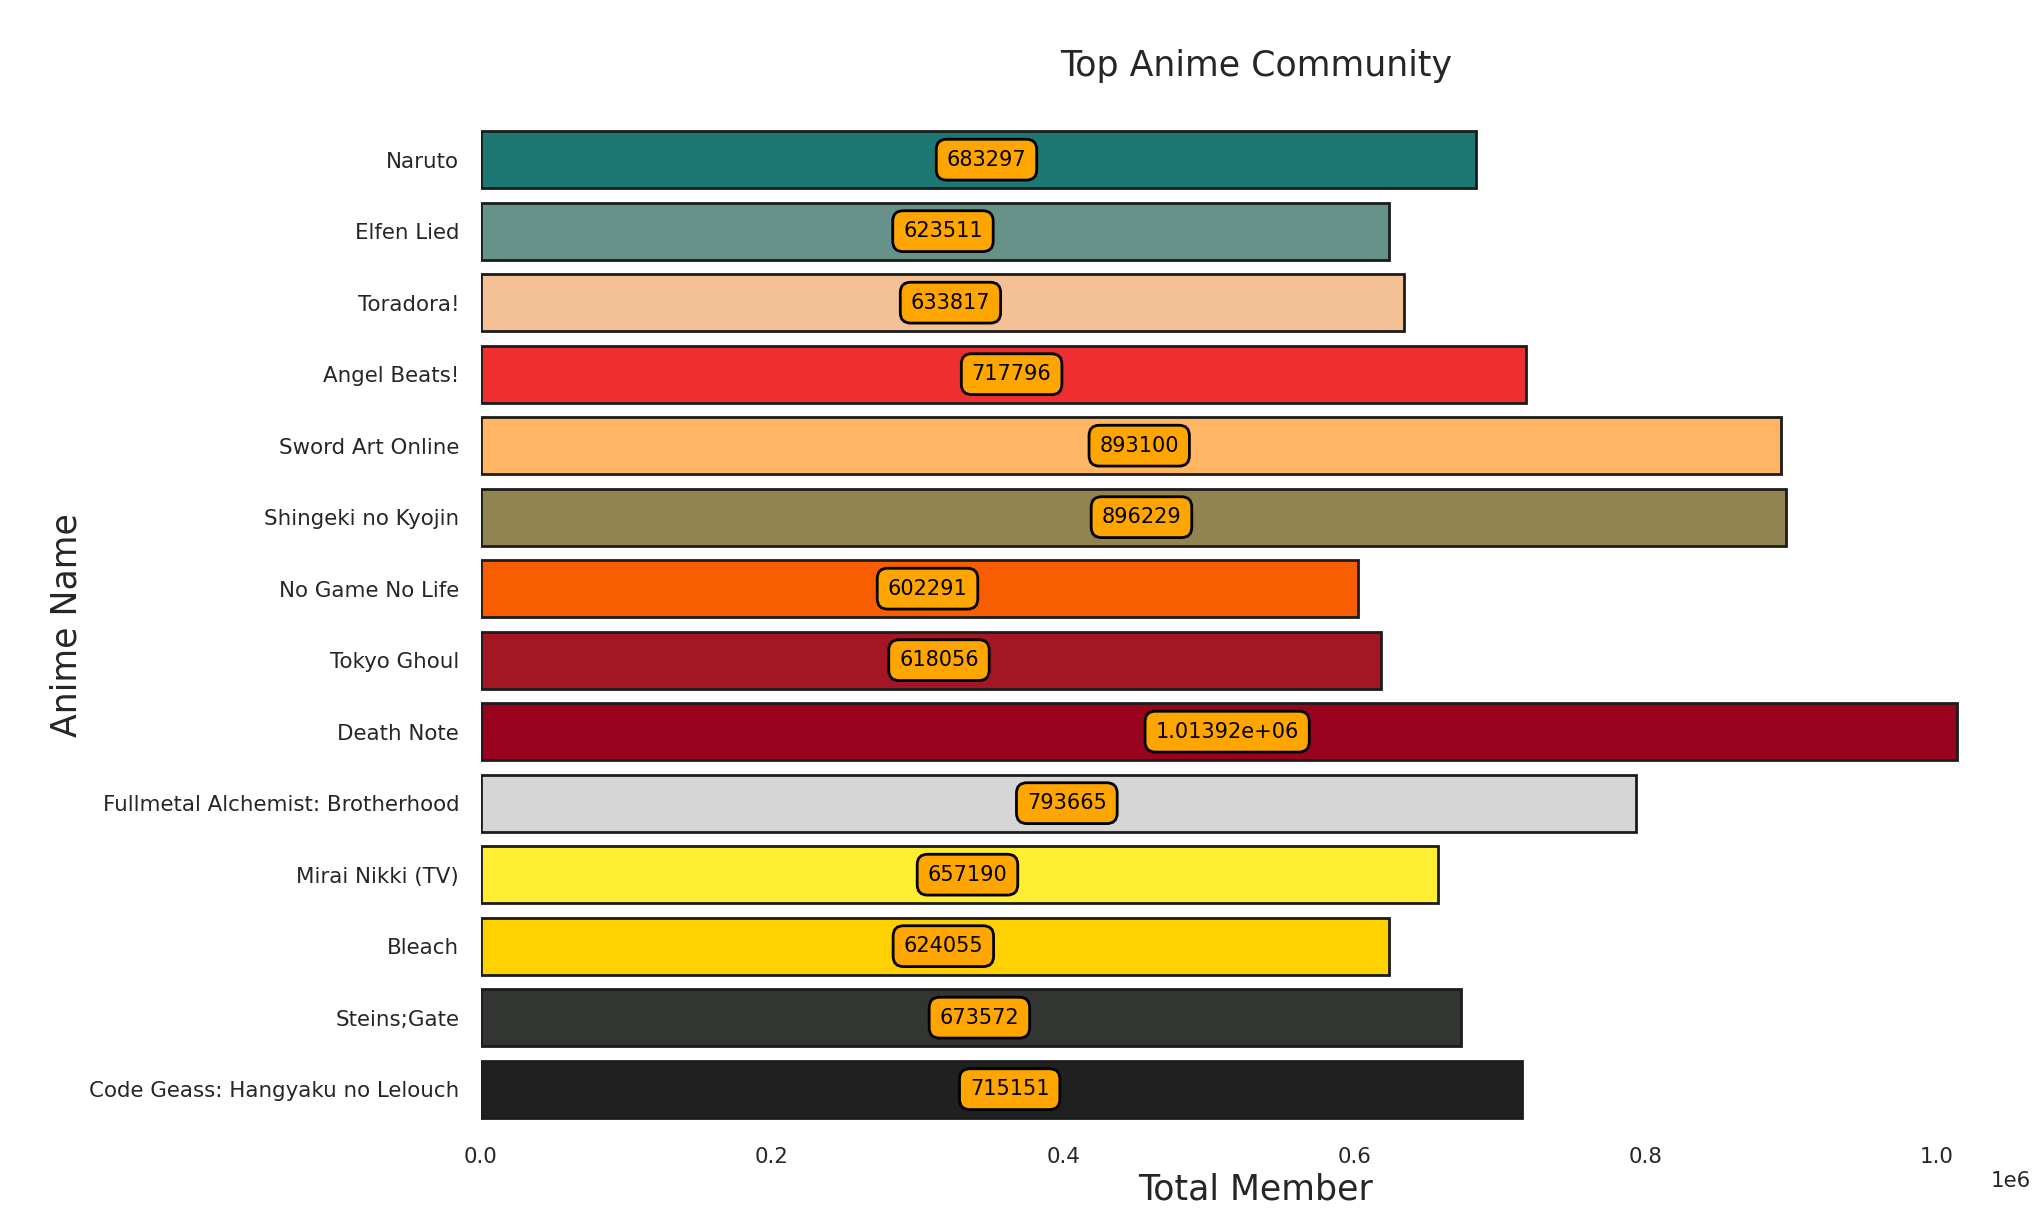

In [ ]:
top_anime = df.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,13))
p = sns.barplot(x=top_anime_temp1["members"],y=top_anime_temp1["name"][:14],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("\nAnime Name" , fontsize = 25)
plt.xlabel("Total Member" , fontsize = 25)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.5, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
print("Anime Categories :")
top_anime_temp1["type"].value_counts().to_frame()

Anime Categories :


,type
TV,3402
OVA,3089
Movie,2112
Special,1581
ONA,526
Music,451


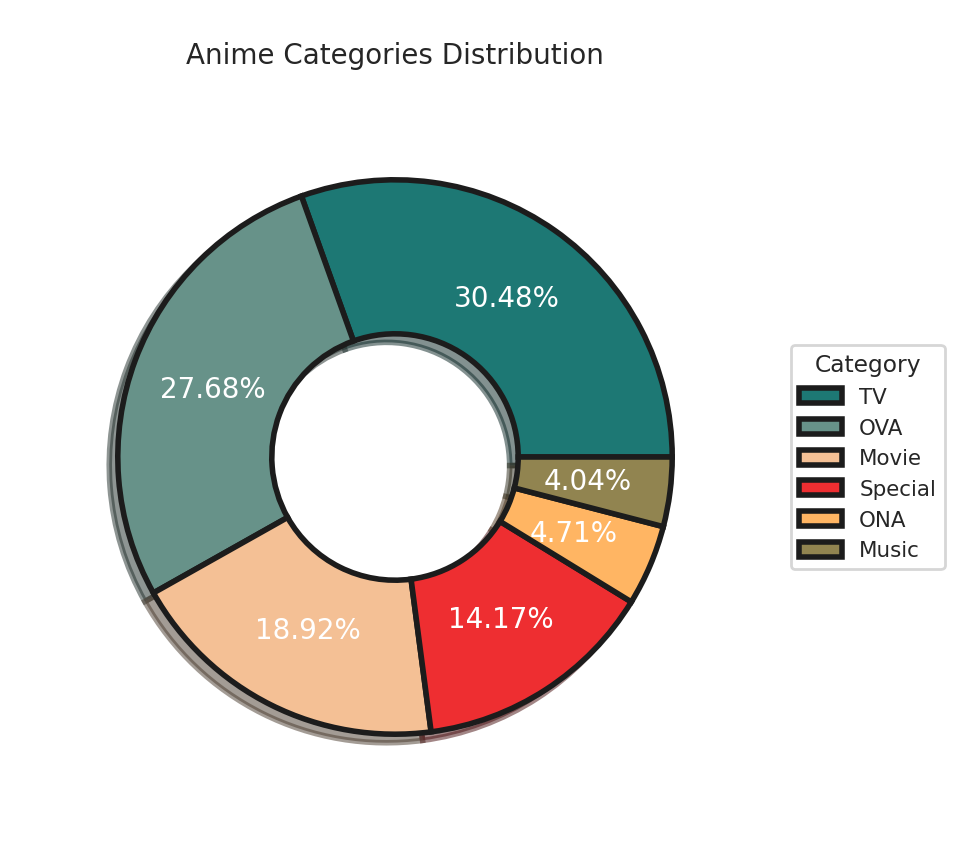

In [ ]:
plt.subplots(figsize=(10, 10))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.9,
                                    colors = palette,
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c",
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

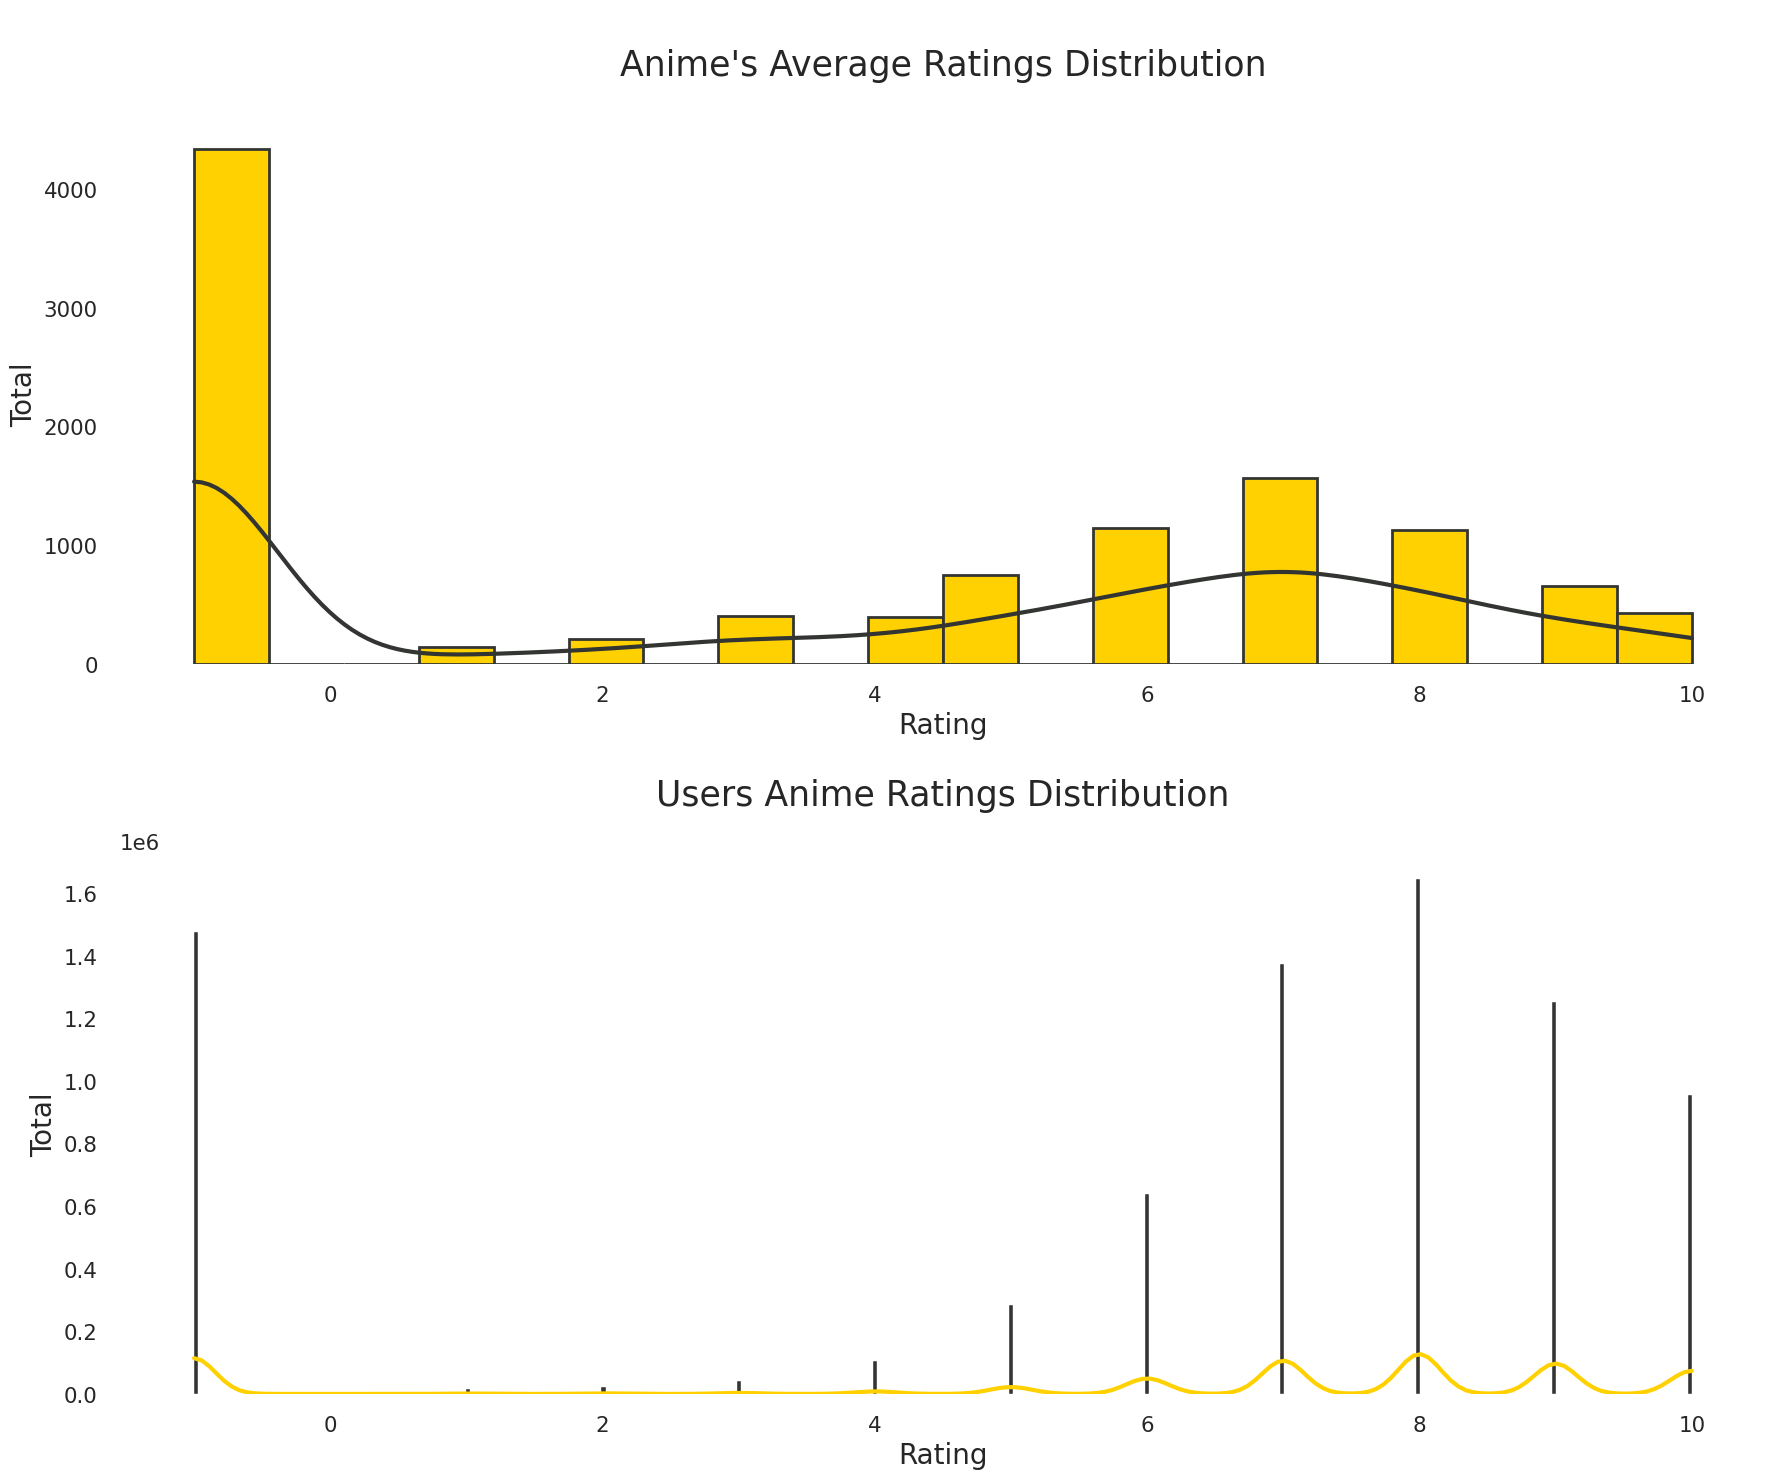

In [ ]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(df["rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
def draw_distribution_by_category(category):
    _, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
    plt.tight_layout(pad=4.0)

    sns.histplot(top_anime_temp2[top_anime_temp2["type"]==category]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
    axs[0].lines[0].set_color(palette[11])
    axs[0].set_title(f"\nAnime's Average Ratings Distribution [Category : {category}]\n",fontsize=20)
    axs[0].set_xlabel("Rating")
    axs[0].set_ylabel("Total")

    sns.histplot(df[df["type"]==category]["rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
    axs[1].lines[0].set_color(palette[11])
    axs[1].set_title(f"\nUsers Anime Ratings Distribution [Category : {category}]\n",fontsize=20)
    axs[1].set_xlabel("Rating")
    axs[1].set_ylabel("Total")

    sns.despine(left=True, bottom=True)
    plt.show()

['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music']


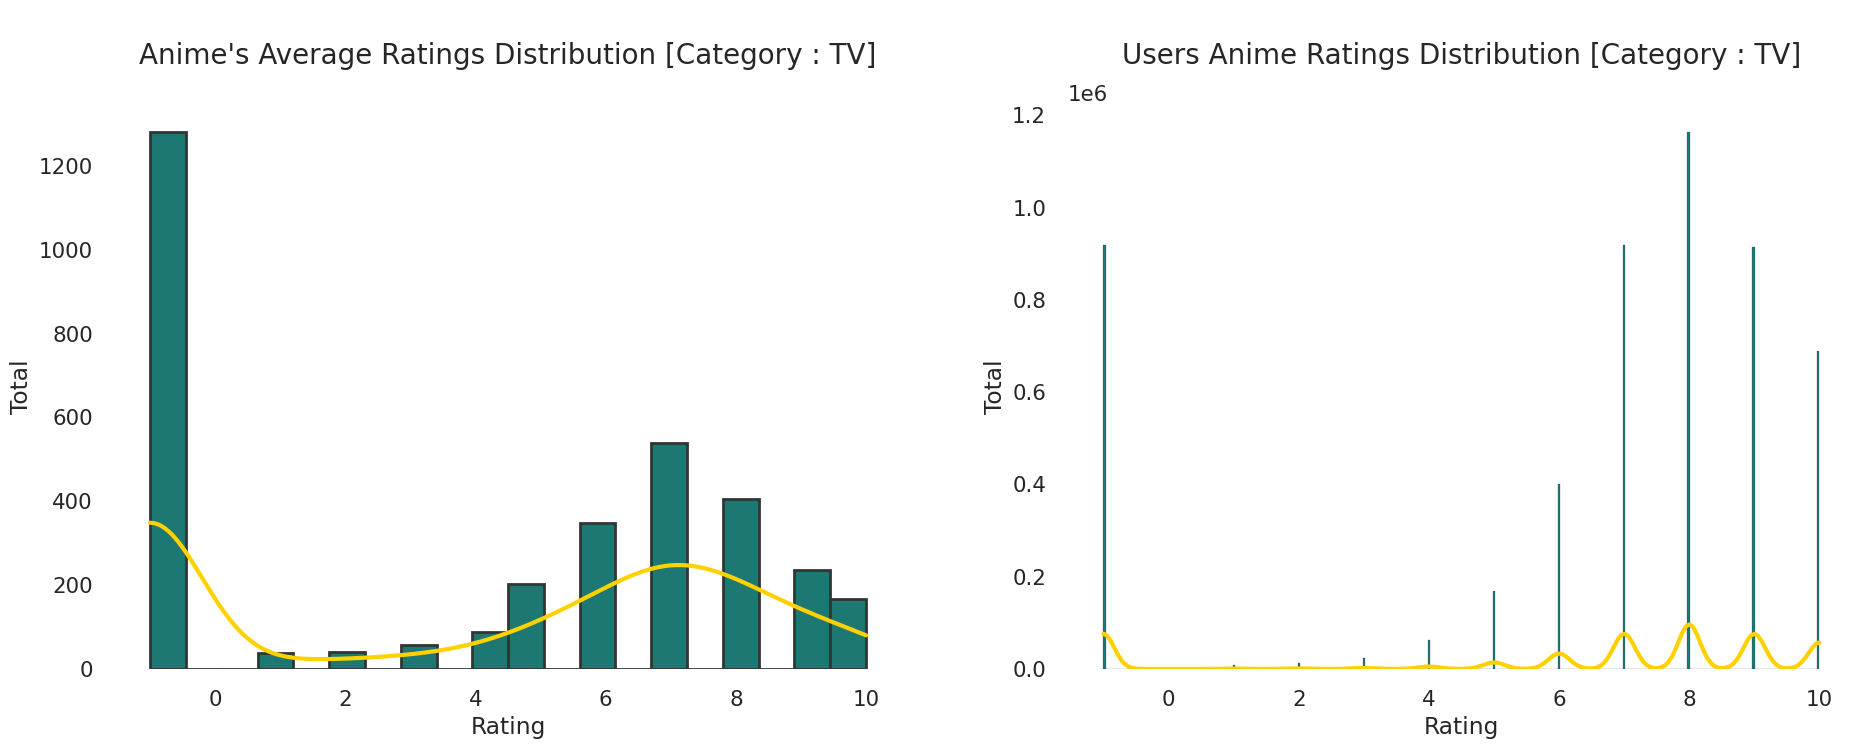

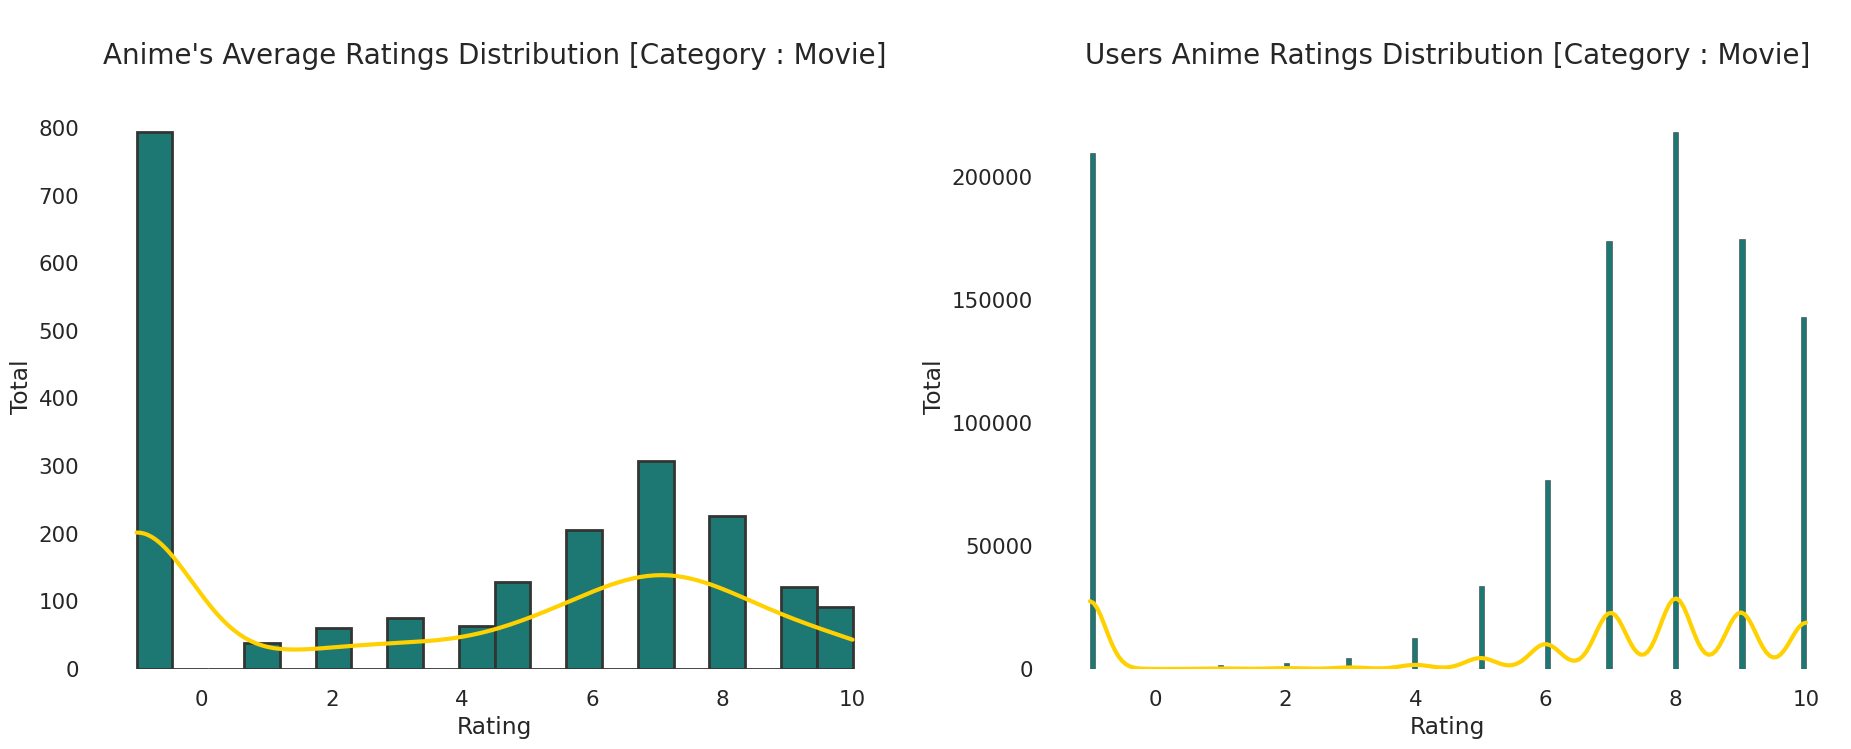

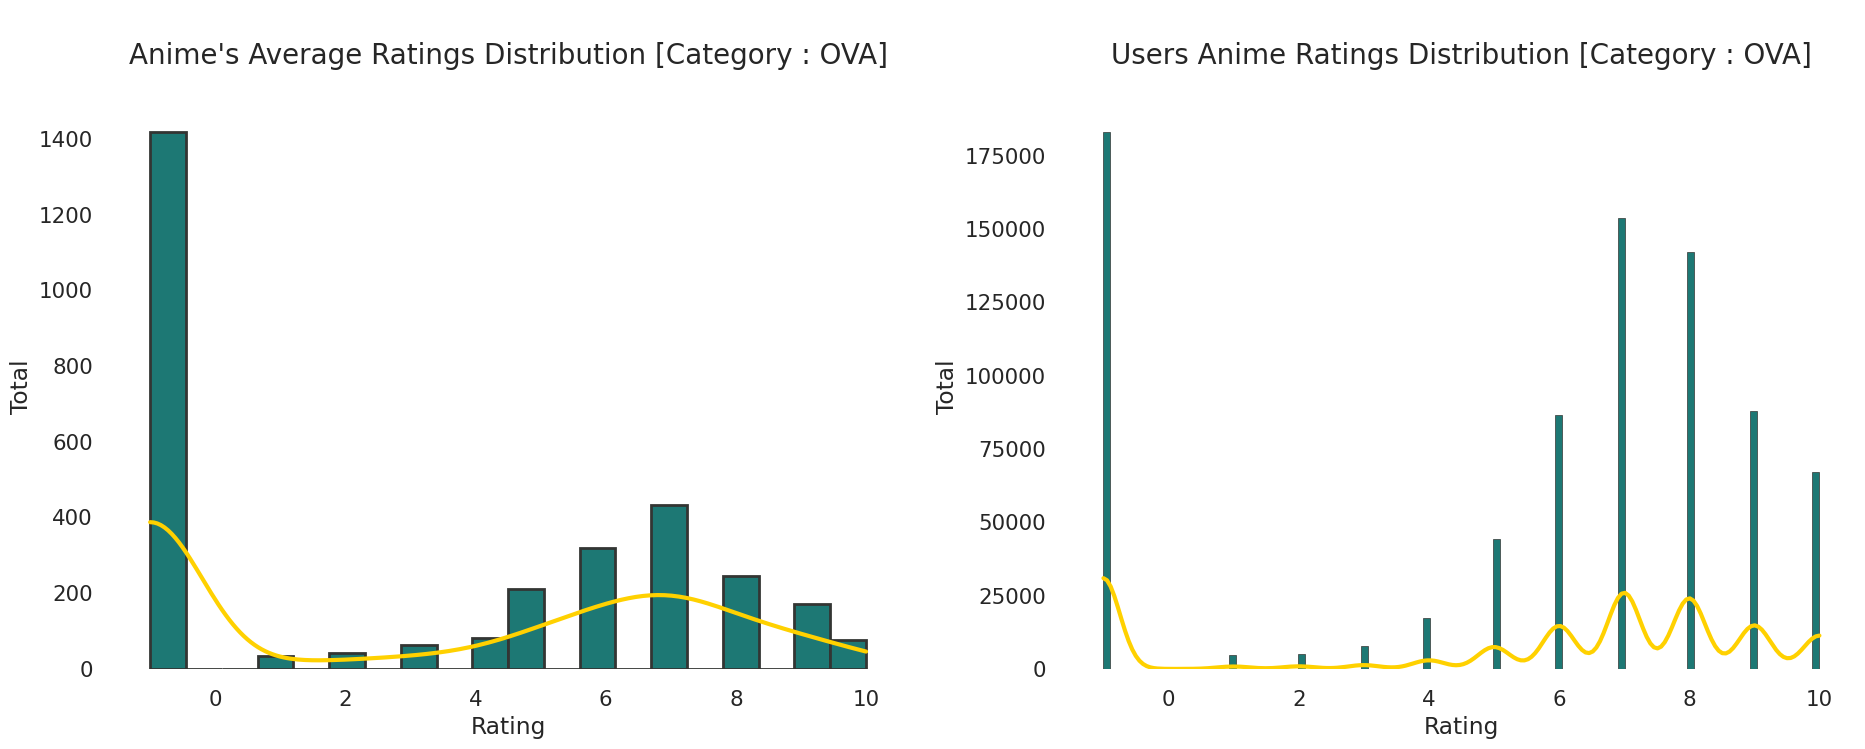

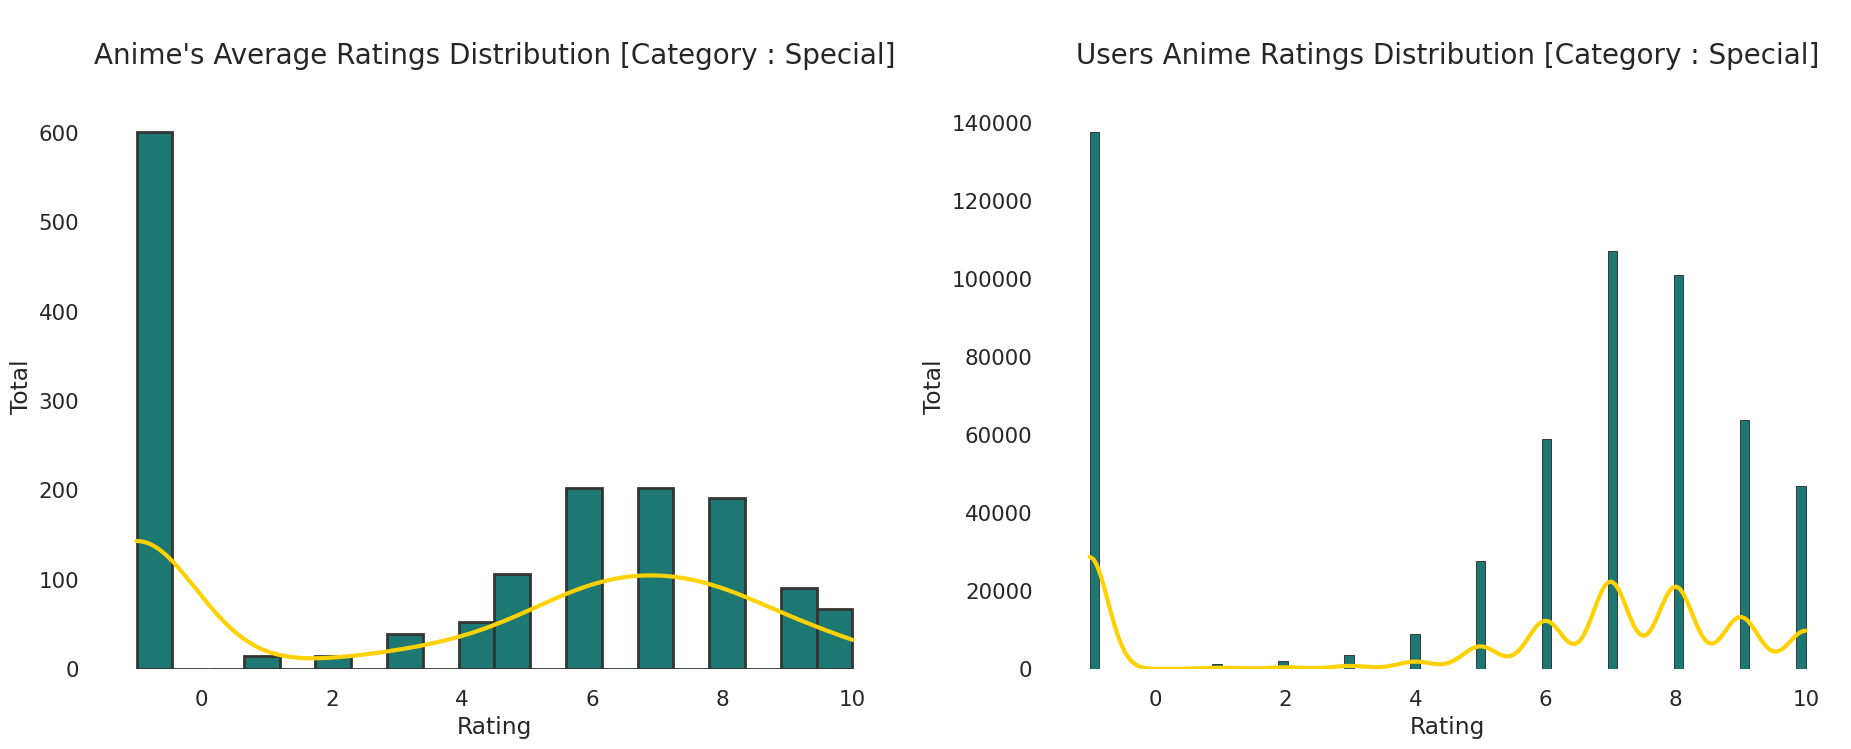

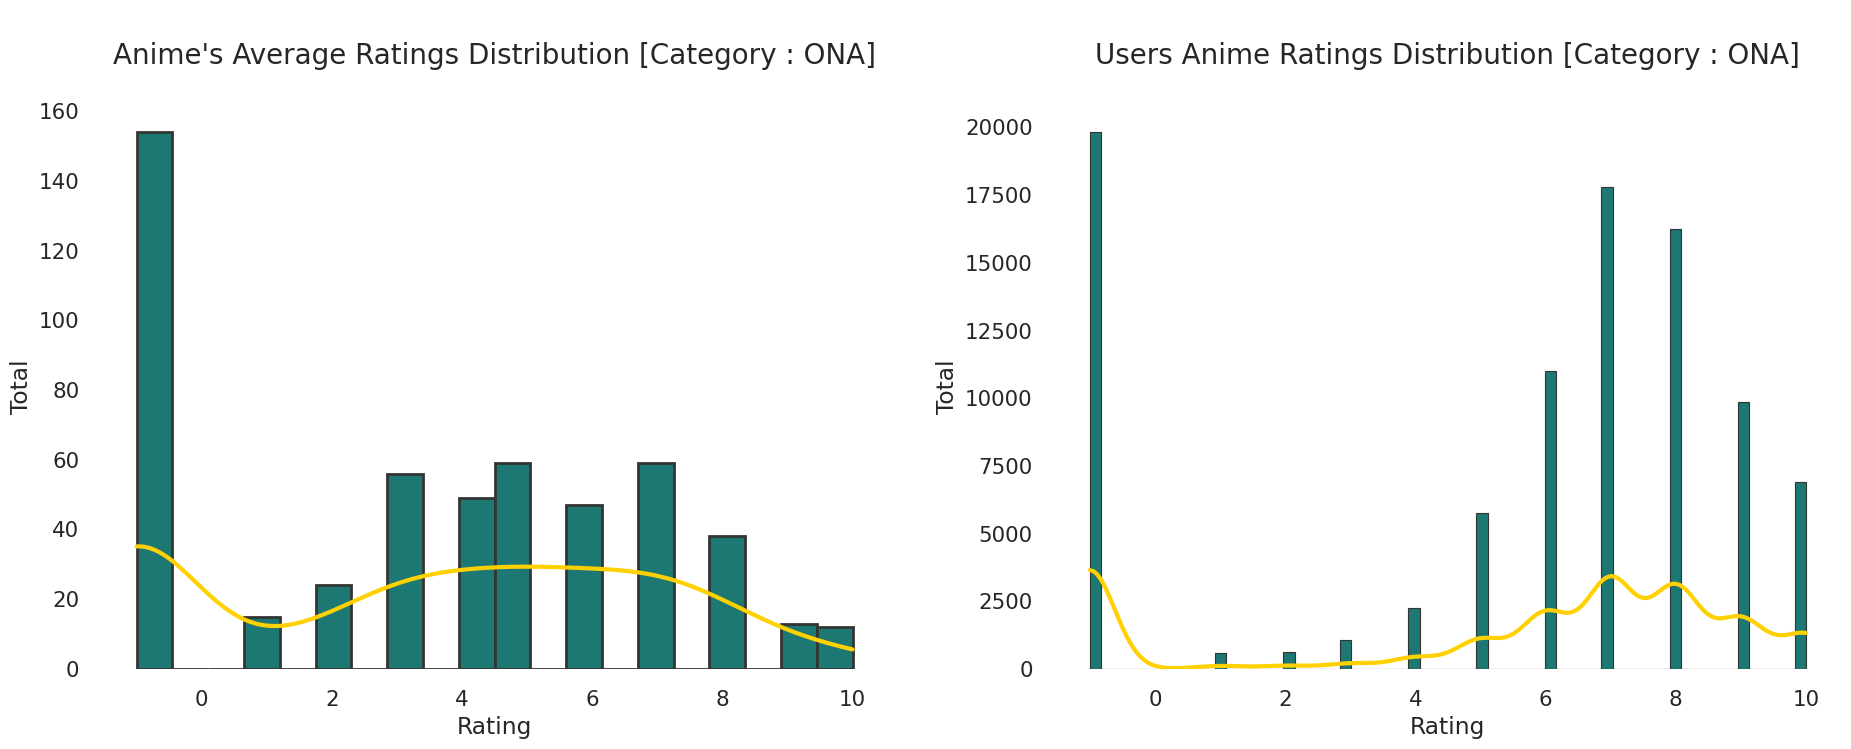

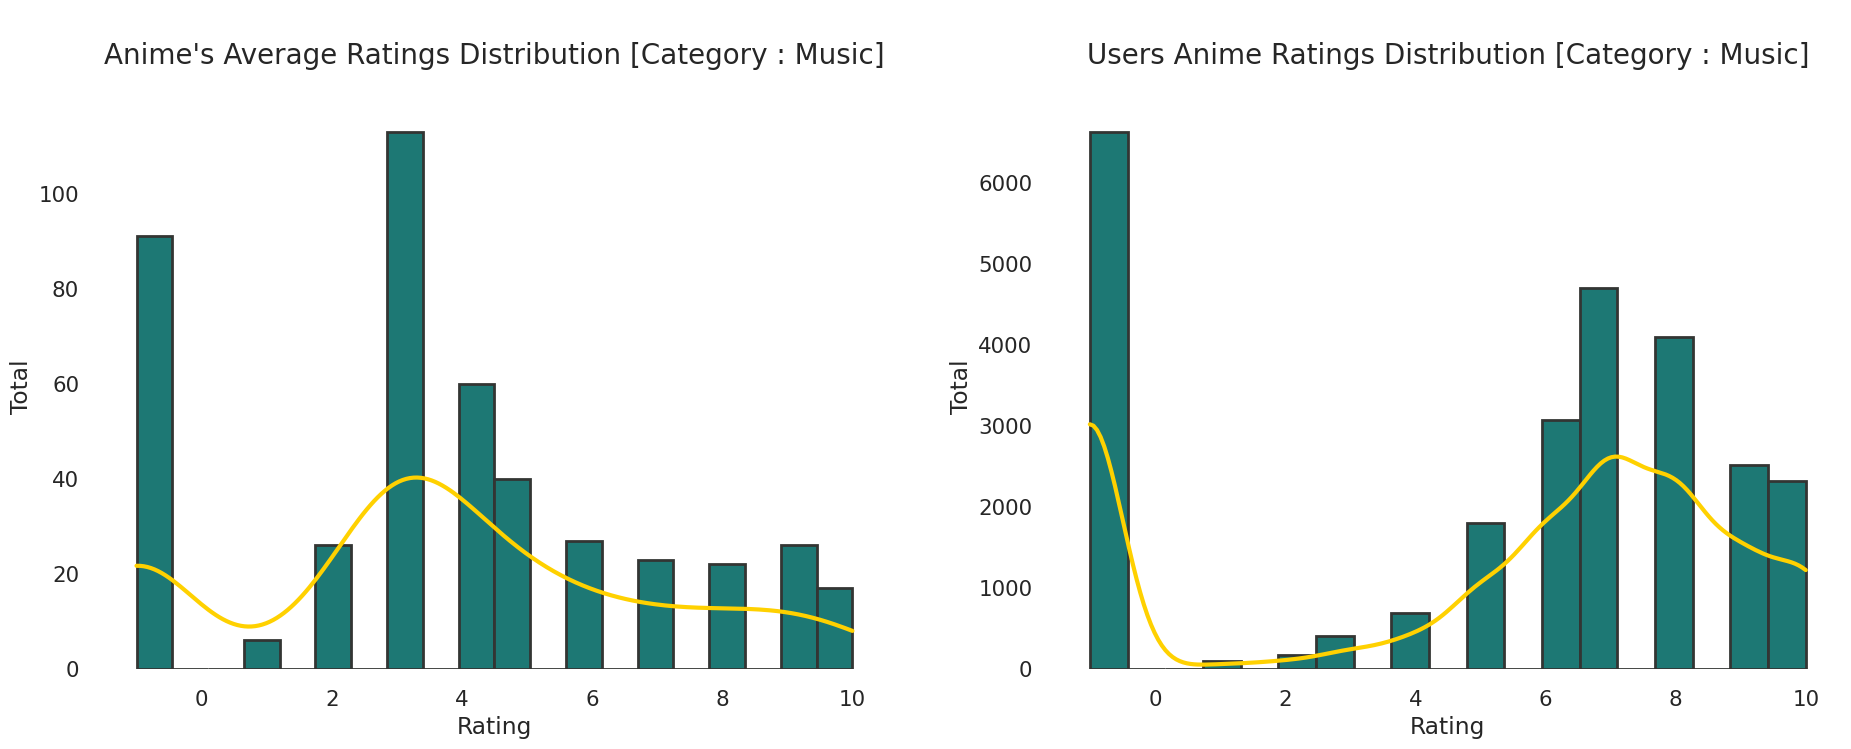

In [ ]:
print(df['type'].unique())
for i in  df['type'].dropna().unique():
    draw_distribution_by_category(i)


## Anime by genre:

In [ ]:
def search_gerne(df_interactions, df_description, feature, verbose=0):
    '''
    Function to search all items that have 'feature' in one column of dataframe
    df_description (column 'gerne' in this case) and search all corresponding
    interactions on df_interactions
    -------------
    Return:
      Dataframe df_result             All interactions whose item has feature
    '''

    # Creation of a item list with gerne = feature
    item_list = [] # anime_list
    for i in range(df_description.shape[0]):
      _ = str(df_description.iloc[i,2])
      if _ != 'nan':
        if feature in _:
            item_list.append(df_description.iloc[i,0])

    if verbose: print('Number of Items - {}: {}'.format(feature, len(item_list)))

    # Search anime found before in df_interactions
    interaction_list = []
    for i in item_list:
        _ = df_interactions[df_interactions['anime_id'] == i].index
        interaction_list.extend(_)

    if verbose: print('Number of Iteractions - {}: {}'.format(feature, len(interaction_list)))

    return df_interactions.loc[interaction_list, :]

In [ ]:
# Creation of a list for all anime genres
gerne_list = []

for i in progress_bar(range(anime_df.shape[0])):
  _ = str(anime_df.iloc[i,2])
  if _ != 'nan':
    _ = anime_df.iloc[i,2].split(', ')
    gerne_list.extend(_)

gerne_list = list(set(gerne_list))

print('Number of genres: ', len(gerne_list))
print('Genres:\n', gerne_list)

Number of genres:  43
Genres:
 ['Shoujo', 'Romance', 'Ecchi', 'Kids', 'Shounen Ai', 'Super Power', 'Martial Arts', 'Thriller', 'Sports', 'Harem', 'Sci-Fi', 'Seinen', 'Horror', 'Drama', 'Samurai', 'Vampire', 'Yaoi', 'Comedy', 'Game', 'Dementia', 'Magic', 'Fantasy', 'Cars', 'Mecha', 'Mystery', 'Hentai', 'Historical', 'Shoujo Ai', 'Supernatural', 'Adventure', 'Shounen', 'Action', 'Josei', 'Slice of Life', 'School', 'Police', 'Space', 'Yuri', 'Music', 'Military', 'Demons', 'Parody', 'Psychological']


In [ ]:
# Count how much intercations we have on df_rating given a genre
gerne_counts = []
for g in progress_bar(gerne_list):
  _ = search_gerne(rating_df, anime_df, g)
  gerne_counts.append(_.shape[0])

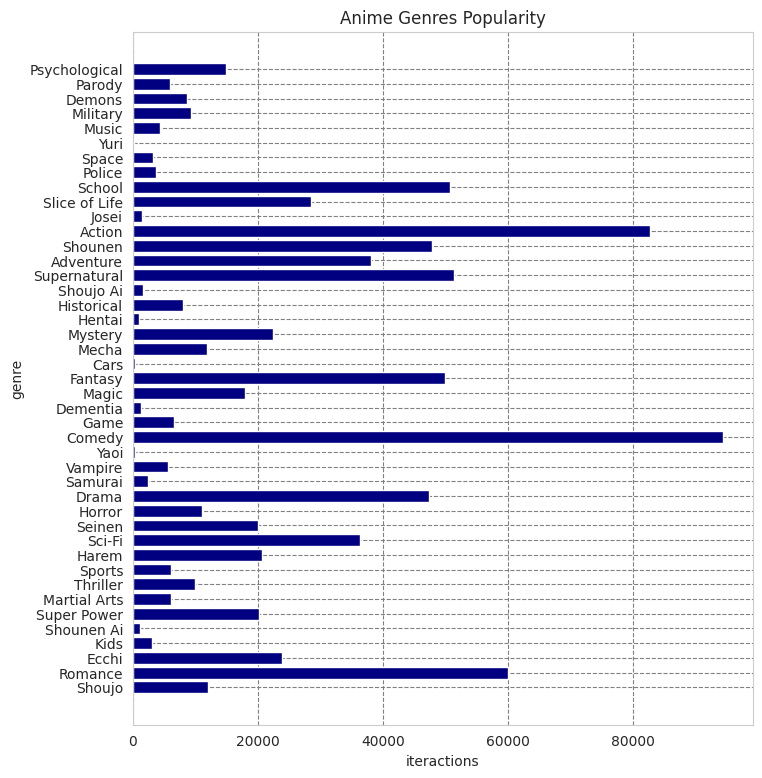

In [ ]:
fig, ax = plt.subplots(figsize=(8,9))

ax.barh(np.arange(len(gerne_list)), gerne_counts, color='navy')

ax.set_yticks(np.arange(len(gerne_list)))
ax.set_yticklabels(gerne_list)
ax.set_title('Anime Genres Popularity')
ax.set_xlabel('iteractions')
ax.set_ylabel('genre')
plt.grid(color='grey', linestyle='--')

#plt.savefig('./figures/anime_genres_popularity.jpg')

plt.show()


## Graph Creation

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
# Add user nodes
for i in progress_bar(rating_df.user_id.unique()):
  G.add_nodes_from([
    ('user_' + str(i), {'node_type':'user'})
  ])

In [ ]:
# Add anime nodes
for i in progress_bar(rating_df.anime_id.unique()):
  name = anime_df[anime_df['anime_id']==i].name.to_string(index=False)[1:]
  genre = anime_df[anime_df['anime_id']==i].genre.to_string(index=False)[1:].split(', ')
  anime_type = anime_df[anime_df['anime_id']==i]['type'].to_string(index=False)[1:]
  episodes = str(anime_df[anime_df['anime_id']==i].episodes.to_string(index=False)[1:]) # because there is also value 'unknown'

  rating = anime_df[anime_df['anime_id']==i].rating.to_string(index=False)
  if rating != 'NaN':
    rating = float(rating[1:])
  else:
    rating = 0.0

  members = int(anime_df[anime_df['anime_id']==i].members.to_string(index=False)[1:])


  G.add_nodes_from([
    ('anime_' + str(i), {'node_type':'anime',
                         'name':name,
                         'genre':genre,
                         'type':anime_type,
                         'episodes':episodes,
                         'rating':rating,
                         'members':members})
  ])

In [ ]:
# Add user-item iteractions -> Edges
for i in progress_bar(range(rating_df.shape[0])):
  user = 'user_' + str(rating_df.iloc[i,0])
  anime = 'anime_' + str(rating_df.iloc[i,1])
  rating = rating_df.iloc[i,2]

  G.add_edges_from([(user, anime, {'weight':rating})])

Text(0.5, 1.0, 'Some user_item iteractions')

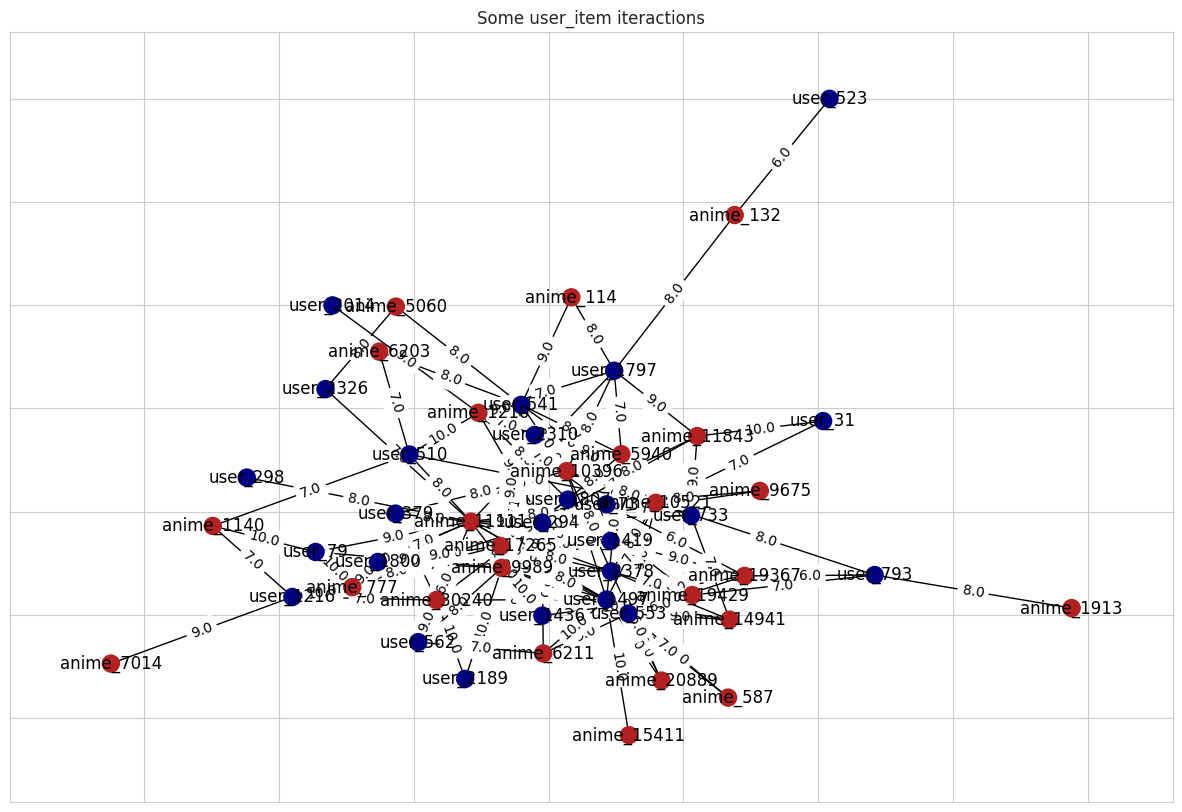

In [ ]:
# ----------------- Creation of a subgraph ---------------------
import random
random.seed = 1
k = 25
ids = random.choices(range(rating_df.shape[0]), k=k)
nodes = []
_ = ['user_'+str(id) for id in rating_df.iloc[ids, :].user_id.unique().tolist()]
num_users = len(_)
nodes.extend(_)
_ = ['anime_'+str(id) for id in rating_df.iloc[ids, :].anime_id.unique().tolist()]
num_items = len(_)
nodes.extend(_)

subG = G.subgraph(nodes)

# ----------------- Plot ----------------------------------------
fig, ax = plt.subplots(figsize=(15,10))

colors = ['navy' if t == 'user' else 'firebrick' for t in nx.get_node_attributes(subG,'node_type').values()]
pos=nx.spring_layout(subG, seed=1)
nx.drawing.nx_pylab.draw_networkx(subG,pos, node_color=colors, node_size=150)

labels = nx.get_edge_attributes(subG,'weight')
nx.draw_networkx_edge_labels(subG,pos,edge_labels=labels)
ax.set_title('Some user_item iteractions')

In [3]:
print('')